In [1]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split


We are getting our stuffs ready by firstly importing all the essential libraries from Python's supported package. Here we have imported four main libraries that we will use during the execution part:

Numpy: For performing mathematical calculations by simplying the same from it's predefined functions
Pandas: Pandas is the data manipulation library which helps in playing with DataFrames.
Matplotlib: This is one of the most common library used for visualization that is closest to python backend.
Seaborn: Another visualization library that is better in terms of representation, look and feel but built on top of matplotlib.

In [3]:
df_org = pd.read_csv('/content/Student_academic.csv')
df_org.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Inference: We are working with a dataset that includes 35 columns and 4424 rows, focusing on college student data. For our analysis, we have selected a sample dataset that represents features such as "Marital status," "Application mode," "Application order," and more. Our primary objective is to perform data preprocessing tasks, including identifying normal distributions in specific columns and removing outliers. Here, we've shown a snippet of the dataset with just a few columns to illustrate the process.

In [4]:
df_org.shape

(4424, 35)

Inference: As shape function stimulates that we have 4424 rows of data with 35columns -> (4424,35)

In [5]:
df_org.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3947,1,8,4,13,1,1,1,23,27,4,...,0,7,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
1700,1,1,1,12,1,1,1,23,27,10,...,0,8,8,8,15.633750,0,9.4,-0.8,-3.12,Graduate
827,1,1,3,5,1,1,1,1,3,10,...,0,6,6,6,15.333333,0,11.1,0.6,2.02,Graduate
405,1,1,1,2,1,1,1,1,14,4,...,0,0,0,0,0.000000,0,12.7,3.7,-1.70,Graduate
2378,1,14,1,17,0,1,1,3,4,3,...,3,8,8,3,11.333333,0,7.6,2.6,0.32,Dropout


Inference: Like head function returns the top 5 rows (by default) Similarly, sample function returns the random sample of 'n' rows depending on what value we are giving in the parameter.

In [6]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Inference: Based on the information from df_org.info(), the DataFrame df_org contains 4424 rows and 35 columns, with no null values in any of the columns. The columns have varying data types, including integer, float, and one object column. The memory usage of the DataFrame is approximately 1.2+ MB.

In [7]:
df_org.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

Inference: The DataFrame df_org includes 35 columns with a diverse range of information, such as student attributes, educational data, and economic indicators, all of which contribute to a comprehensive dataset for analysis and modeling.

In [8]:
df_org.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Inference: The statistical summary for the selected 34 columns in the DataFrame is presented below. The summary includes the count of non-null values, the mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each column.

For example, in the 'Marital status' column, there are 4424 non-null values, with a mean of approximately 1.18, a standard deviation of about 0.61, a minimum value of 1, and a maximum value of 6.

This summary provides essential statistics that help understand the distribution and characteristics of the data in each column, aiding in data analysis and decision-making.

In [9]:
total = df_org.isnull().sum().sort_values(ascending=False)
percent_1 = df_org.isnull().sum()/df_org.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_df_org = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_df_org.head(5)

,Total,%
Marital status,0,0.0
Curricular units 2nd sem (enrolled),0,0.0
Curricular units 1st sem (enrolled),0,0.0
Curricular units 1st sem (evaluations),0,0.0
Curricular units 1st sem (approved),0,0.0


Inference: The output from the code reveals that the top 5 columns in the DataFrame df_org have no missing values, as indicated by a total count of 0. The percentage of missing values in these columns is also 0%, indicating that they are complete and contain data for all 4424 entries. This information confirms that these particular columns are free from missing data, making them suitable for analysis without the need for data imputation.

**Label Encoding**

In [10]:
#converting categorical into numerical
labelencoder = LabelEncoder()
df_org['Target'] = labelencoder.fit_transform(df_org['Target'])
df_org.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


Inference: The provided data snippet represents the first few rows of the DataFrame df_org with several columns that have been transformed into numerical format, including 'Marital status,' 'Application mode,' 'Course,' and others. Additionally, the 'Target' column has been encoded into numerical values. This transformation is important for making the data compatible with machine learning algorithms and analysis, ensuring efficient data processing and modeling.

In [11]:
df_org.Target.unique()

array([0, 2, 1])

Inference: The df_org.Target.unique() output displays the unique values present in the 'Target' column of the DataFrame df_org. The unique values are [0, 2, 1], indicating that this column contains three distinct categories or classes. Understanding these unique values is essential for tasks like classification, as they represent the possible outcomes or labels within the 'Target' variable.

**Distribution of Dropout, Graduate and Enrolled**

In [12]:
df_org['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

0 -> Dropout

1 -> Graduate

2 -> Enrolled

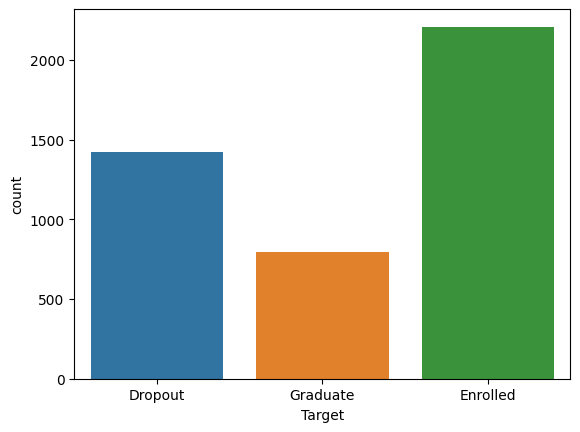

In [14]:
# Create the countplot
sns.countplot(x='Target', data= df_org)

# Set the x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=["Dropout", "Graduate", "Enrolled"])

# Show the plot
plt.show()

In [48]:
# separating the data for analysis
dropout = df_org[df_org.Target==0]
graduate = df_org[df_org.Target==1]
enrolled = df_org[df_org.Target==2]

In [49]:
print(dropout.shape)
print(graduate.shape)
print(enrolled.shape)

(1421, 35)
(794, 35)
(2209, 35)


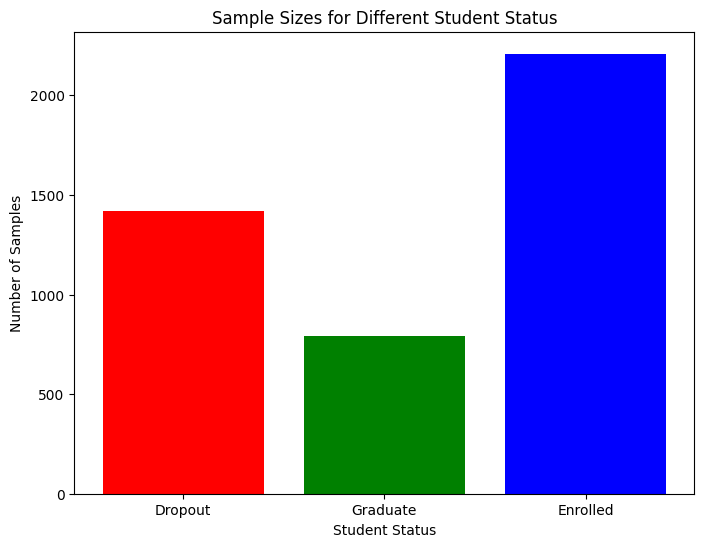

In [83]:
import matplotlib.pyplot as plt

# Sample sizes and labels
sample_sizes = [1421, 794, 2209]
labels = ['Dropout', 'Graduate', 'Enrolled']

# Create a bar chart to visualize the sample sizes
plt.figure(figsize=(8, 6))
plt.bar(labels, sample_sizes, color=['red', 'green', 'blue'])
plt.xlabel('Student Status')
plt.ylabel('Number of Samples')
plt.title('Sample Sizes for Different Student Status')
plt.show()



In [50]:
df_org.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In this student dataset, most students are unmarried, with a mean marital status of 1. Students typically apply via the mode with an index around 7, and their application order ranges from 0 to 9. The dataset covers various courses (mean course index ~9.90), and the majority attend classes during the daytime (mean daytime attendance ~0.89). Additionally, students generally have some prior qualification (mean ~2.53) and come from diverse nationalities, with varying parental qualifications and maternal occupations.

In [51]:
df_org.groupby('Target').mean()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Target,,,,,,,,,,,,,,,,,,,,,
0,1.261084,8.342013,1.593244,9.898663,0.854328,3.059113,1.250528,13.102745,16.716397,6.916256,...,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
1,1.152393,7.238035,1.625945,9.732997,0.905542,2.434509,1.309824,11.240554,15.502519,7.797229,...,0.177582,0.358942,5.938287,9.435768,4.057935,11.117364,0.187657,11.272544,1.211713,0.053287
2,1.134903,5.824808,1.851064,9.959258,0.909009,2.226799,1.237211,12.208692,16.629697,7.403803,...,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833


Dropout (Target: Dropout): Students in this category tend to have relatively higher "Application mode" scores (around 8.34) and more "Father's qualification" (approximately 16.72). They are more likely to be "Debtors" (around 21.96%), and the majority are not "Scholarship holders" (about 90.57%).

Enrolled (Target: Enrolled): Students in this category often have more varied "Father's occupation" (around 8.59) and higher "Tuition fees up to date" (approximately 94.71%). They have a mix of "Scholarship holders" (around 16.37%) and tend to be "Displaced" (approximately 54.53%).

Graduate (Target: Graduate): Graduated students have higher "Marital status" (around 1.13) and generally do not have "Educational special needs" (about 1.04%). Most of them are not "Debtors" (around 4.57%) and have diverse "Course" preferences.

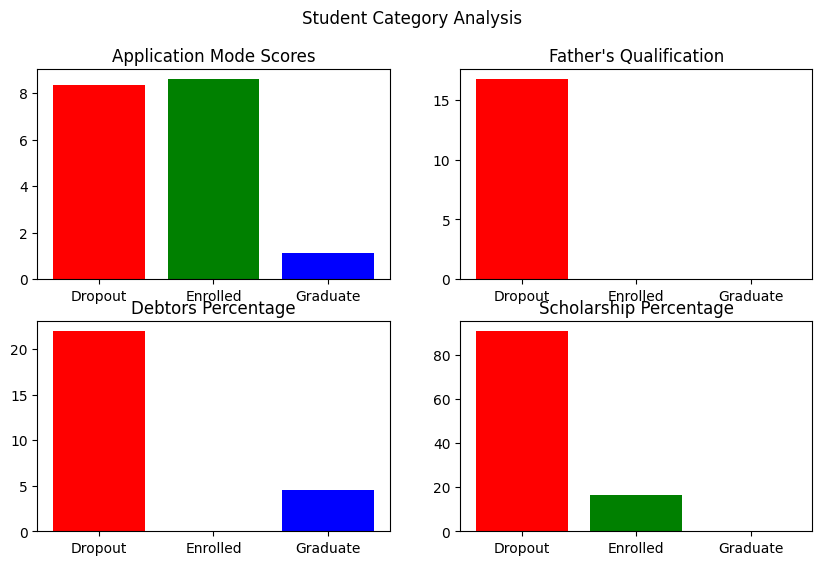

In [86]:
import matplotlib.pyplot as plt

# Define the student categories and their respective data
categories = ["Dropout", "Enrolled", "Graduate"]
application_scores = [8.34, 8.59, 1.13]
fathers_qualification = [16.72, 0, 0]
debtors_percentage = [21.96, 0, 4.57]
scholarship_percentage = [90.57, 16.37, 0]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Student Category Analysis")

# Plot Application Mode Scores
axes[0, 0].bar(categories, application_scores, color=['red', 'green', 'blue'])
axes[0, 0].set_title("Application Mode Scores")

# Plot Father's Qualification
axes[0, 1].bar(categories, fathers_qualification, color=['red', 'green', 'blue'])
axes[0, 1].set_title("Father's Qualification")

# Plot Debtors Percentage
axes[1, 0].bar(categories, debtors_percentage, color=['red', 'green', 'blue'])
axes[1, 0].set_title("Debtors Percentage")

# Plot Scholarship Percentage
axes[1, 1].bar(categories, scholarship_percentage, color=['red', 'green', 'blue'])
axes[1, 1].set_title("Scholarship Percentage")

# Display the plot
plt.show()


In [45]:
df_org.groupby('Target').agg(['mean', 'median'])

Marital status        Application mode        Application order         \
                 mean median             mean median              mean median   
Target                                                                          
0            1.261084    1.0         8.342013    9.0          1.593244    1.0   
1            1.152393    1.0         7.238035    8.0          1.625945    1.0   
2            1.134903    1.0         5.824808    4.0          1.851064    1.0   

          Course        Daytime/evening attendance         ...  \
            mean median                       mean median  ...   
Target                                                     ...   
0       9.898663   10.0                   0.854328    1.0  ...   
1       9.732997    9.0                   0.905542    1.0  ...   
2       9.959258   11.0                   0.909009    1.0  ...   

       Curricular units 2nd sem (grade)         \
                                   mean median   
Target                                           
0                              5.899339    0.0   
1                             11.117364   12.0   
2                             12.697276   13.0   

       Curricular units 2nd sem (without evaluations)         \
                                                 mean median   
Target                                                         
0                                            0.237861    0.0   
1                                            0.187657    0.0   
2                                            0.080579    0.0   

       Unemployment rate        Inflation rate              GDP         
                    mean median           mean median      mean median  
Target                                                                  
0              11.616397   11.1       1.283955    1.4 -0.150859   0.32  
1              11.272544   11.1       1.211713    1.4  0.053287   0.32  
2              11.639339   11.1       1.197918    0.6  0.081833   0.79  

[3 rows x 68 columns]

<Axes: xlabel='Target', ylabel='count'>

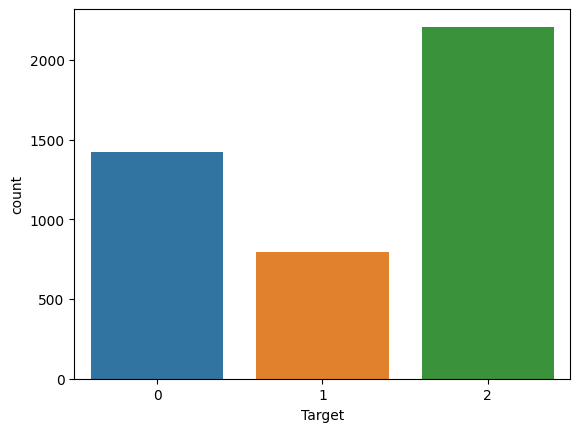

In [84]:
sns.countplot(x= 'Target',data = df_org )

Inference: The code utilizes the groupby function to group the DataFrame df_org by the 'Target' column, and then computes the mean and median values for each numeric attribute within these groups. The result provides a comparison between the mean and median values for each attribute across the three unique 'Target' values: 0, 1, and 2.

This analysis reveals insights into how the numeric attributes vary with different 'Target' categories, helping to understand the central tendencies and distributions of these attributes for each group. It can be valuable for making data-driven decisions and identifying patterns related to the 'Target' variable.

<Figure size 1200x600 with 0 Axes>

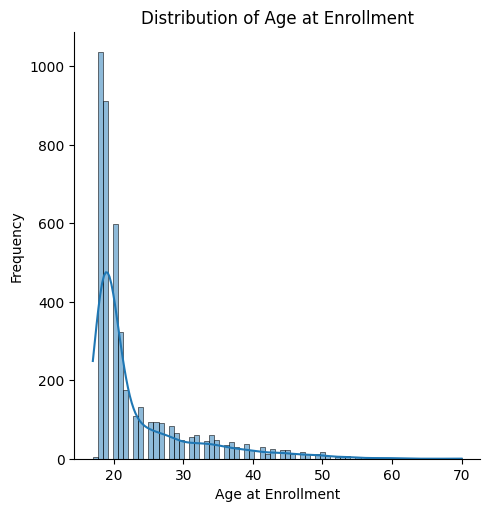

In [18]:
# Distribution of Age at Enrollment
plt.figure(figsize=(12, 6))
sns.displot(data= df_org, x='Age at enrollment', kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()


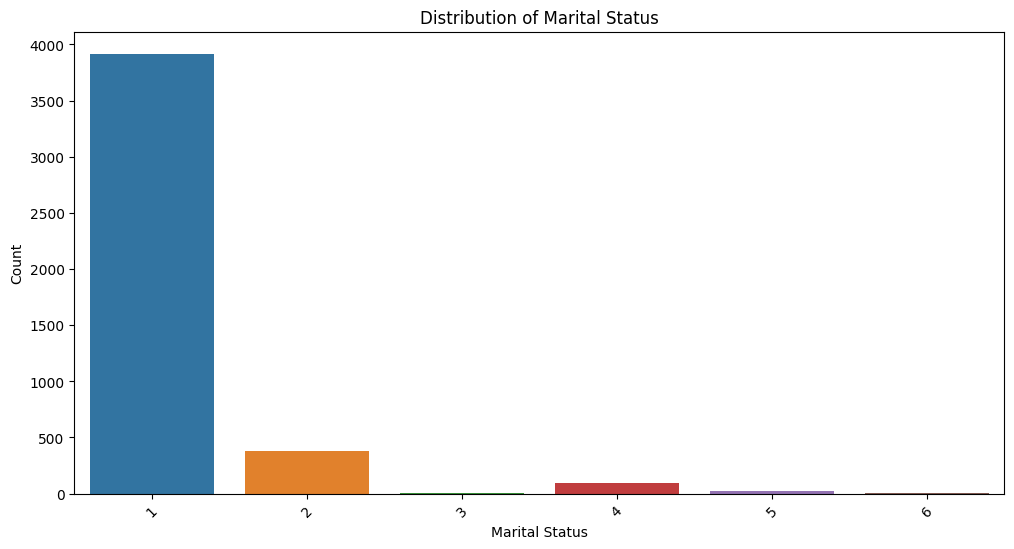

In [ ]:
# Distribution of Marital Status
plt.figure(figsize=(12, 6))
sns.countplot(data= df_org, x='Marital status')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


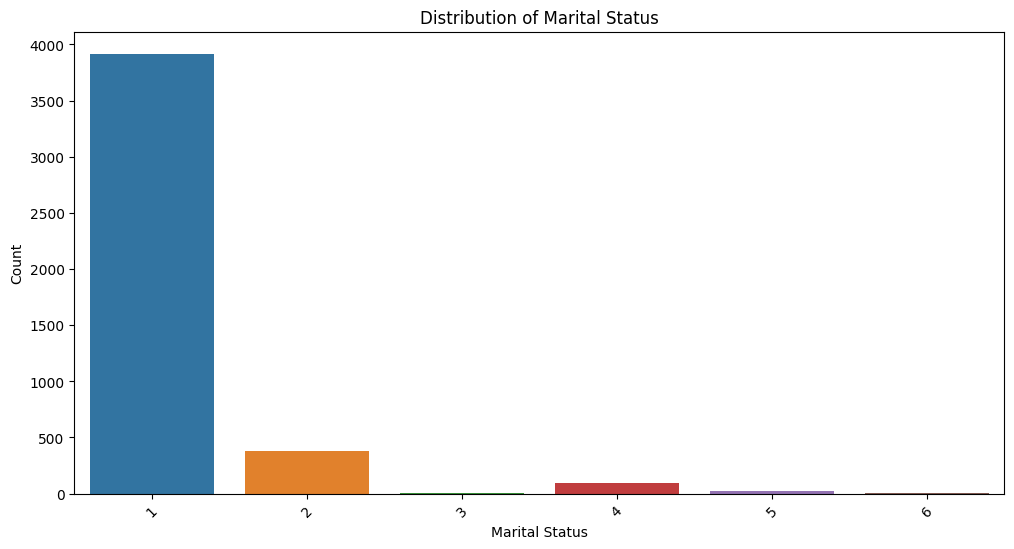

In [52]:
# Distribution of Marital Status
plt.figure(figsize=(12, 6))
sns.countplot(data = df_org, x='Marital status')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Calculate the Z-score for each feature
from scipy import stats
z_score = np.abs(stats.zscore( df_org))

# define a threshold for outliers detection
threshold = 3

# find and mark the outliers
outliers = (z_score > threshold).any(axis=1)

# Create a new dataframe with outliers removed
student_no_outliers = df_org[~outliers]
student_no_outliers.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [54]:
student_no_outliers.shape

(3537, 35)

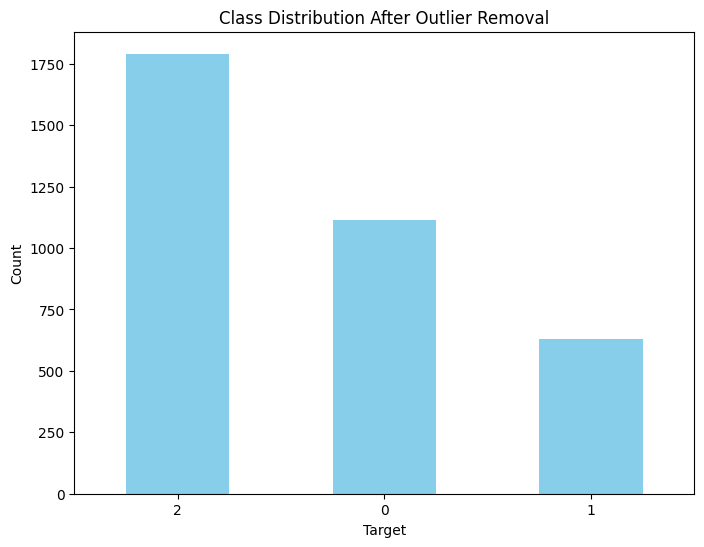

In [55]:
import matplotlib.pyplot as plt

# Count the number of data points in each class of the 'Target' column
class_counts = student_no_outliers['Target'].value_counts()

# Create a bar chart to visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution After Outlier Removal')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Separate X data and Y data

In [56]:
x = student_no_outliers.drop(columns='Target', axis=1)
y = student_no_outliers['Target']

In [57]:
print(x.shape)
print(y.shape)

(3537, 34)
(3537,)


**Scaling of the Data**

In [58]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [31]:
normalized_data = scaler.fit_transform(x)
print(normalized_data)

[[0.         0.4375     1.         ... 0.37209302 0.48888889 0.7661823 ]
 [0.         0.3125     0.         ... 0.73255814 0.11111111 0.64068692]
 [0.         0.         1.         ... 0.37209302 0.48888889 0.7661823 ]
 ...
 [0.         0.875      0.         ... 1.         0.24444444 0.41479524]
 [0.         0.         0.         ... 0.73255814 0.11111111 0.64068692]
 [0.         0.         0.         ... 0.20930233 0.         0.12417437]]


**Separate X and Y of the normalized data**

In [68]:
x = normalized_data
y = student_no_outliers['Target']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
print(x_train.shape)
print(x_test.shape,'\n')

print(y_train.shape)
print(y_test.shape)

(2829, 34)
(708, 34) 

(2829,)
(708,)


**Principal Component Analysis**

In [71]:
#Principal Component Analysis
pca = PCA(n_components=0.9)
principalComponents_train = pca.fit_transform(x_train)
principalComponents_test = pca.fit_transform(x_test)

**Model Training**

In [72]:
# Create a dictionary to store the results
results = {}

# Create and train different classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gaussian": GaussianNB()
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model Evaluation**

In [87]:
# Create a DataFrame to display the accuracy results
accuracy_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Display the accuracy for each model
print(accuracy_df)

                    Model  Accuracy
0     Logistic Regression  0.781073
1           Decision Tree  0.716102
2           Random Forest  0.776836
3  Support Vector Machine  0.771186
4                Gaussian  0.694915


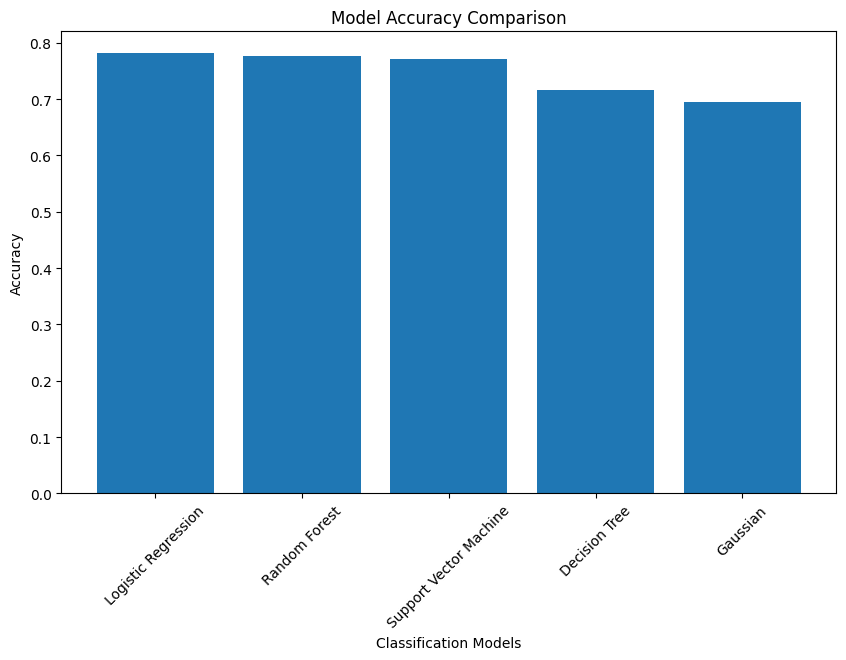

In [90]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'accuracy_df' with columns 'Model' and 'Accuracy'
# 'Model' contains the model names, and 'Accuracy' contains the accuracy scores

# Create a bar chart for model accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"])
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Making a Predictive System**

In [91]:
# Fit the scaler to the training data
scaler.fit(x_train)

# Define the input data
input_data = (1, 1, 1, 16, 1, 1, 1, 13, 14, 8, 8, 1, 0, 0, 1, 0, 0, 18, 0, 0, 7, 7, 6, 11.66666667, 0, 0, 7, 8, 6, 13.5, 0, 16.2, 0.3, -0.92)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Normalize the input data using the fitted scaler
std_input = scaler.transform(input_data_reshaped)
print(std_input)


[[ 1.          1.          1.         16.          1.          1.
   1.         13.         14.          8.          8.          1.
   0.          0.          1.          0.          0.         18.
   0.          0.          7.          7.          6.         11.66666667
   0.          0.          7.          8.          6.         13.5
   0.         16.2         0.3        -0.92      ]]


In [92]:
# Sort the DataFrame by accuracy
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Get the best model
best_model_name = accuracy_df.iloc[0]['Model']
best_model = models[best_model_name]
print(best_model)

LogisticRegression()


In [93]:
# Now you can use the 'best_model' for making predictions
prediction = best_model.predict(input_data_reshaped)

# 'prediction' will contain the predicted class label (0, 1, or 2) for the input data
if prediction == 0:
    print('The Student will not Graduate')
elif prediction == 1:
    print('The Student will Graduate')
else:
    print('The Student is still Enrolled')

print("Predicted Outcome:", prediction)

The Student will not Graduate
Predicted Outcome: [0]


Errors

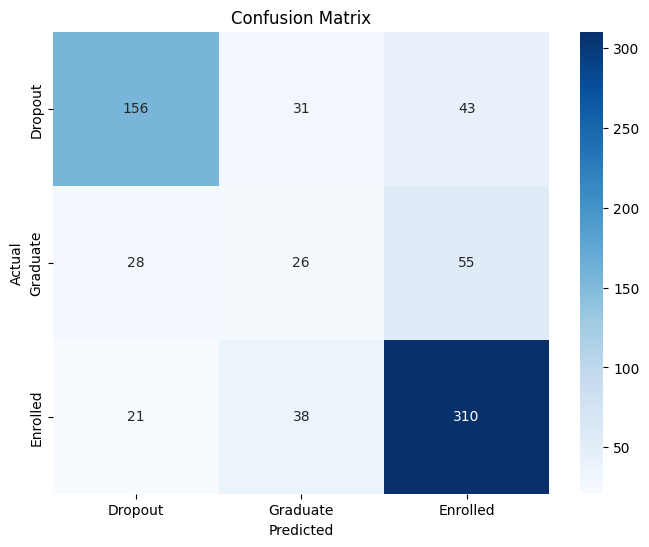

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       230
           1       0.27      0.24      0.25       109
           2       0.76      0.84      0.80       369

    accuracy                           0.69       708
   macro avg       0.60      0.59      0.59       708
weighted avg       0.69      0.69      0.69       708



In [78]:
from sklearn.metrics import confusion_matrix, classification_report
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)


AUC-ROC Curve:

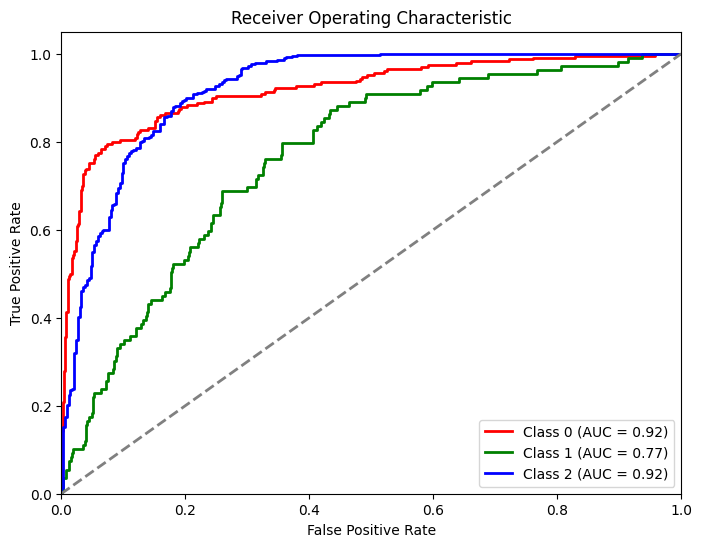

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

# Binarize the target variable (multiclass to binary for each class)
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get the predicted probabilities for each class
y_prob = best_model.predict_proba(x_test)

# Initialize variables to store ROC and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(3):  # Assuming you have three classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
